In [5]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from DS_data_transformation import get_prm

In [51]:
dirname = '/home/rt2122/Data/cur/recall2epoch/'
files = next(os.walk(dirname))[-1]
model_files = {}
model_files['pz'] = [s for s in files if s[:len('pz_ep')] == 'pz_ep']
model_files['pz_act'] = [s for s in files if s[:len('pz_act')] == 'pz_act']

In [50]:
def extract_recall(df, catalogs = ['planck_z', 'planck_no_z', 'mcxcwp', 'act'], with_fp=True):
    import numpy as np
    line = {}
    for cat in catalogs:
        cur = df[df['catalog'] == cat]
        line[cat] = np.count_nonzero(cur['status'] == 'tp') / len(cur)
    if with_fp:
        line['fp'] = np.count_nonzero(df['status'] == 'fp')
    return line

In [53]:
model_dict = {'pz' : [], 'pz_act' : []}
for model in model_dict:
    cur_files = model_files[model]
    for file in cur_files:
        df = pd.read_csv(os.path.join(dirname, file))
        line = extract_recall(df)
        model_dict[model].append(pd.DataFrame(line, index=[int(get_prm('ep', file))]))
    model_dict[model] = pd.concat(model_dict[model]).sort_index()

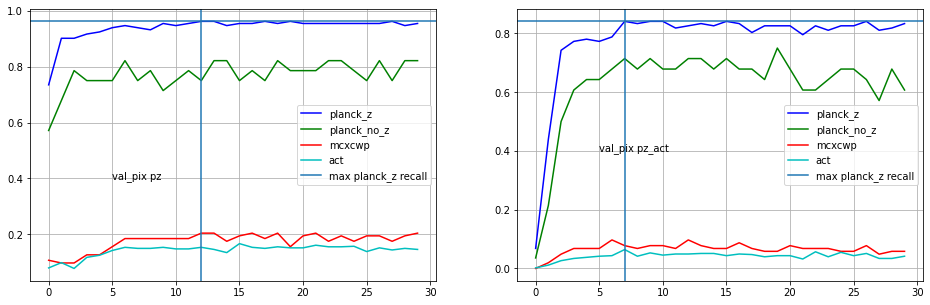

In [59]:
_, ax = plt.subplots(1, 2, figsize=(16, 5))
for i, model in enumerate(model_dict):
    for cat, c in zip(['planck_z', 'planck_no_z', 'mcxcwp', 'act'], 'bgrc'):
        line, = ax[i].plot(np.arange(0, 30), model_dict[model][cat], c=c)
        line.set_label(cat)

    line = ax[i].axvline(np.array(model_dict[model]['planck_z']).argmax())
    line.set_label('max planck_z recall')
    line = ax[i].axhline(np.array(model_dict[model]['planck_z']).max())
    ax[i].text(5, 0.4, 'val_pix ' + model)
    ax[i].grid()
    ax[i].legend()

max_recall epochs [12 13 17 19 27]
max_recall epochs [ 7  9 10 15 26]


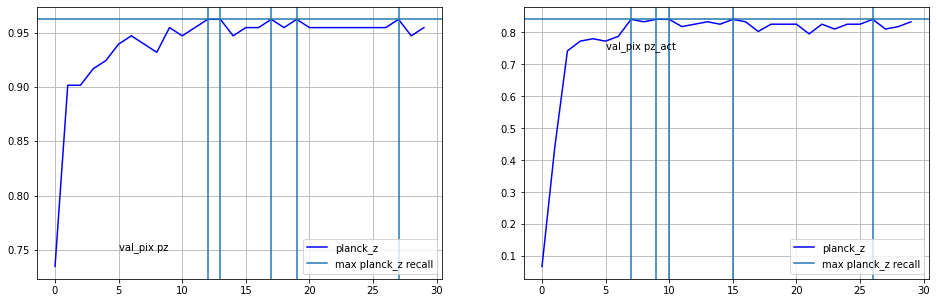

In [62]:
_, ax = plt.subplots(1, 2, figsize=(16, 5))
for i, model in enumerate(model_dict):
    for cat, c in zip(['planck_z'], 'b'):
        line, = ax[i].plot(np.arange(0, 30), model_dict[model][cat], c=c)
        line.set_label(cat)

    m = np.array(model_dict[model]['planck_z']).max()
    mm = np.where(np.array(model_dict[model]['planck_z'] == m))[0]
    print('max_recall epochs', mm)
    [ax[i].axvline(k) for k in mm]
    line = ax[i].axhline(m)
    line.set_label('max planck_z recall')
    ax[i].text(5, 0.75, 'val_pix ' + model)
    ax[i].grid()
    ax[i].legend()

min_fp epochs [2]
min_fp epochs [0]


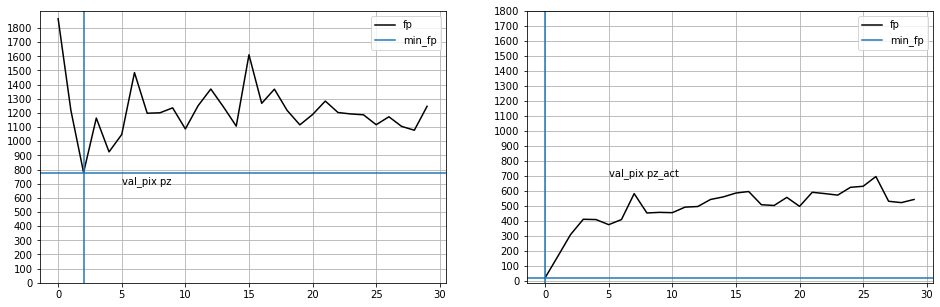

In [68]:
_, ax = plt.subplots(1, 2, figsize=(16, 5))
for i, model in enumerate(model_dict):
    for cat, c in zip(['fp'], 'k'):
        line, = ax[i].plot(np.arange(0, 30), model_dict[model][cat], c=c)
        line.set_label(cat)

    m = np.array(model_dict[model]['fp']).min()
    mm = np.where(np.array(model_dict[model]['fp'] == m))[0]
    print('min_fp epochs', mm)
    [ax[i].axvline(k) for k in mm]
    line = ax[i].axhline(m)
    line.set_label('min_fp')
    ax[i].set_yticks(np.arange(0, 1900, 100))
    ax[i].text(5, 700, 'val_pix ' + model)
    ax[i].grid()
    ax[i].legend()